In [1]:
from cryptosystem import *

import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar

In [2]:
public_key, private_key = generate_keys(40)

In [3]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

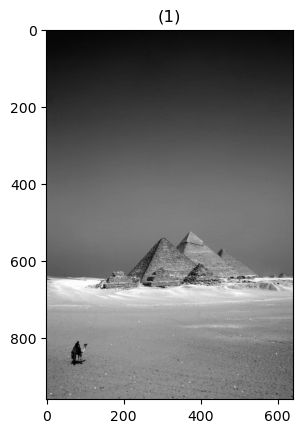

array([[  6,   6,   6, ...,   7,   8,   8],
       [  6,   6,   6, ...,   8,   8,   8],
       [  6,   6,   6, ...,   8,   9,   8],
       ...,
       [ 87, 103, 119, ...,  97,  88,  87],
       [100, 114, 127, ..., 102,  94,  94],
       [101, 120, 127, ..., 110,  99,  96]])

In [4]:
pyramids = io.imread("pyramids.jpeg")
grayscale_pyramids = (rgb2gray(pyramids) * 255).astype(int)
show_images([grayscale_pyramids])
grayscale_pyramids

In [5]:
encrypted_pyramids = encrypt_tensor(public_key, grayscale_pyramids)
encrypted_pyramids_display = encrypted_pyramids % 255
decrypted_pyramids = decrypt_tensor(private_key, public_key, encrypted_pyramids) % 255
decrypted_pyramids

array([[mpz(6), mpz(6), mpz(6), ..., mpz(7), mpz(8), mpz(8)],
       [mpz(6), mpz(6), mpz(6), ..., mpz(8), mpz(8), mpz(8)],
       [mpz(6), mpz(6), mpz(6), ..., mpz(8), mpz(9), mpz(8)],
       ...,
       [mpz(87), mpz(103), mpz(119), ..., mpz(97), mpz(88), mpz(87)],
       [mpz(100), mpz(114), mpz(127), ..., mpz(102), mpz(94), mpz(94)],
       [mpz(101), mpz(120), mpz(127), ..., mpz(110), mpz(99), mpz(96)]],
      dtype=object)

In [6]:
encrypted_pyramids_display = image_mpz_to_int(encrypted_pyramids_display).astype(np.uint8)

In [7]:
decrypted_pyramids = image_mpz_to_int(decrypted_pyramids).astype(np.uint8)

In [8]:
np.sum(np.not_equal(grayscale_pyramids, decrypted_pyramids))

7

In [9]:
grayscale_pyramids.shape

(960, 640)

In [10]:
grayscale_pyramids = grayscale_pyramids.astype(np.uint8)

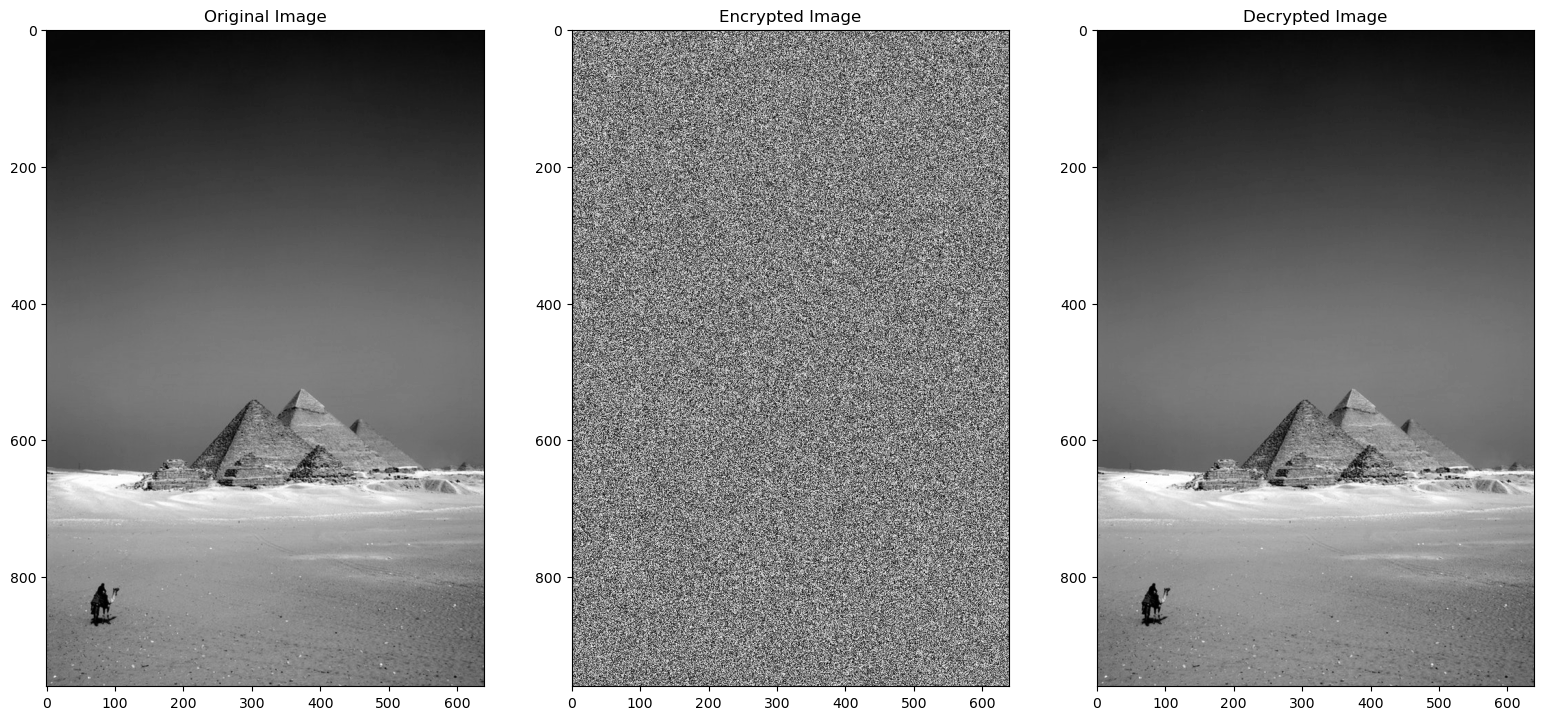

In [13]:
show_images([grayscale_pyramids, encrypted_pyramids_display, decrypted_pyramids], ["Original Image", "Encrypted Image", "Decrypted Image"])